<a href="https://colab.research.google.com/github/sreelakshmy-byte/Iris-clustering-unsupevised-learning/blob/main/Iris_clustering_unsupevised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assessment: Unsupervised Learning-IRIS Clustering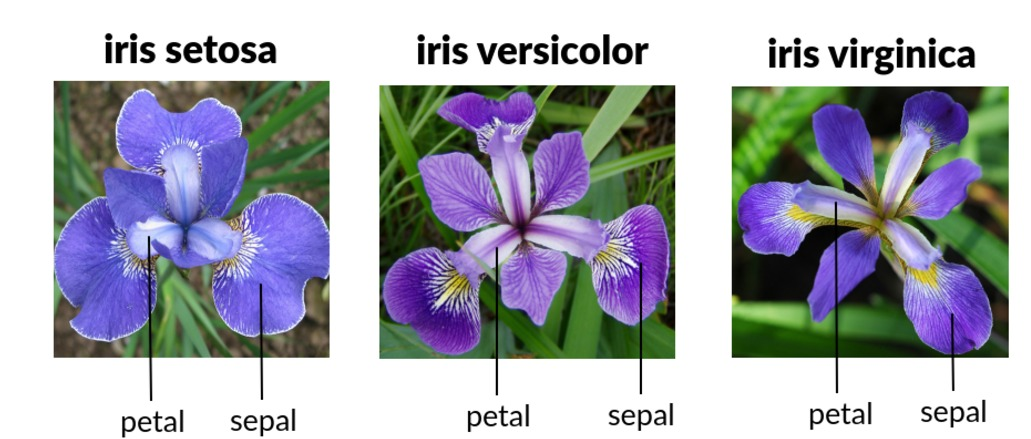

Objective:
The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset.
# New Section

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
# Display the first few rows of the dataset
print("First few rows of the Iris dataset:")
print(df.head())



First few rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
 # Remove the 'species' column for the outlier analysis
df = df.drop('species', axis=1)

In [ ]:
# Print the last few rows of the dataset
print("\nLast few rows of the Iris dataset:")
print(df.tail())



Last few rows of the Iris dataset:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8


In [ ]:
#shape
df.shape

(150, 4)

In [ ]:
# Display information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [ ]:
# Check for missing values
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
#duplicate rows
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Displaying duplicate rows
print("Duplicate rows:")
print(df[duplicates])

Number of duplicate rows: 1
Duplicate rows:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
142                5.8               2.7                5.1               1.9


In [ ]:
# Removing duplicate rows
df_unique = df.drop_duplicates(keep='first')

In [ ]:
# Verify the duplicate removal
duplicates_after = df_unique.duplicated()
print(f"Number of duplicate rows after removal: {duplicates_after.sum()}")

Number of duplicate rows after removal: 0


In [ ]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


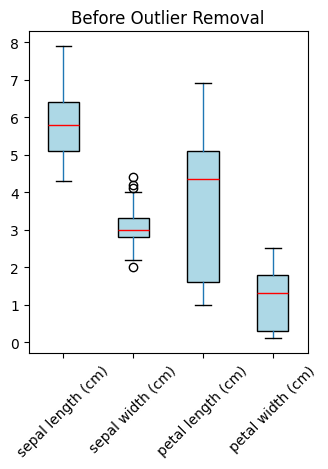

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplot(1, 2, 1)
df.boxplot(grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'), medianprops=dict(color='red'))
plt.title('Before Outlier Removal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate Q1, Q3, and IQR
def calculate_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR
    # Print Q1, Q3, and IQR before outlier removal
Q1, Q3, IQR = calculate_iqr(df)
print("Original Data:")
for col in df.columns:
    print(f"{col}: Q1={Q1[col]:.2f}, Q3={Q3[col]:.2f}, IQR={IQR[col]:.2f}")

Original Data:
sepal length (cm): Q1=5.10, Q3=6.40, IQR=1.30
sepal width (cm): Q1=2.80, Q3=3.30, IQR=0.50
petal length (cm): Q1=1.60, Q3=5.10, IQR=3.50
petal width (cm): Q1=0.30, Q3=1.80, IQR=1.50


In [25]:
# Remove outliers using the IQR method
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_no_out = remove_outliers_iqr(df)

<Figure size 1000x600 with 0 Axes>

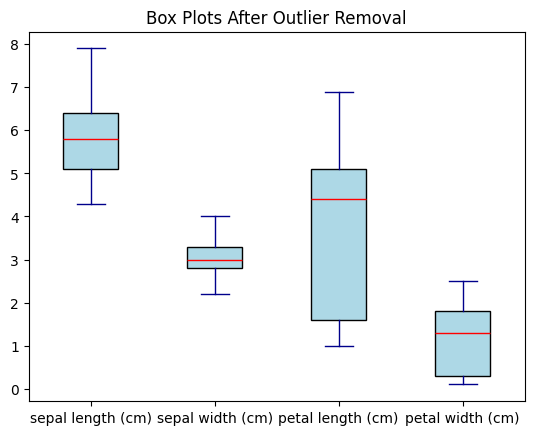

In [26]:
# Plot box plots after outlier removal
plt.figure(figsize=(10, 6))
df_no_out.plot(kind='box', color='darkblue', patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))
plt.title('Box Plots After Outlier Removal')
plt.show()

In [30]:
x = df.iloc[:, [0, 1, 2, 3]].values

# Clustering Algorithm Implementation

# A) KMeans Clustering
K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

Suitability for the Iris Dataset
KMeans is suitable for the Iris dataset because:

1.The dataset contains three known clusters (species).

2.Features are continuous, allowing KMeans to effectively measure distances.

3.Clusters in the dataset are relatively well-separated, making KMeans effective.

In [31]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Using the elbow method to determine the optimal number of clusters for k-means clustering

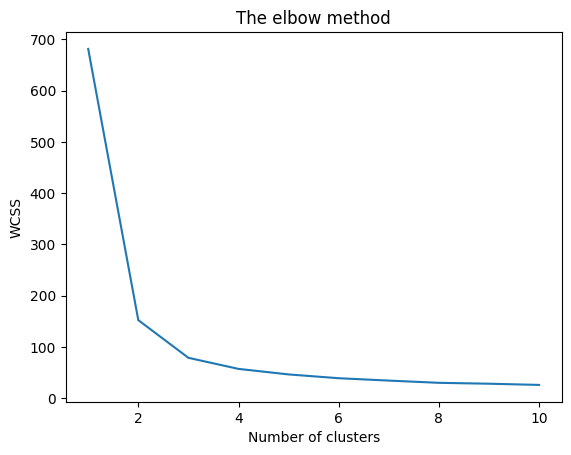

In [32]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

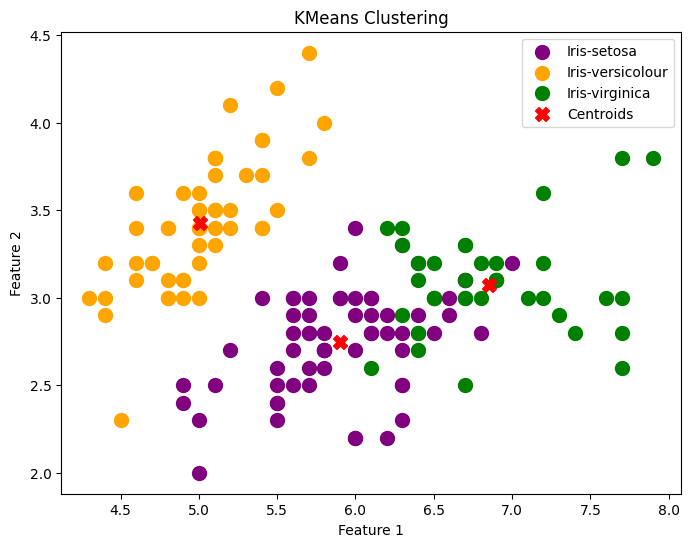

In [34]:
# Plot clusters and centroids
plt.figure(figsize=(8, 6))

colors = ['purple', 'orange', 'green']
labels = ['Iris-setosa', 'Iris-versicolour', 'Iris-virginica']

for i in range(3):
    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1], s=100, c=colors[i], label=labels[i])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids', marker='X')

plt.legend()
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

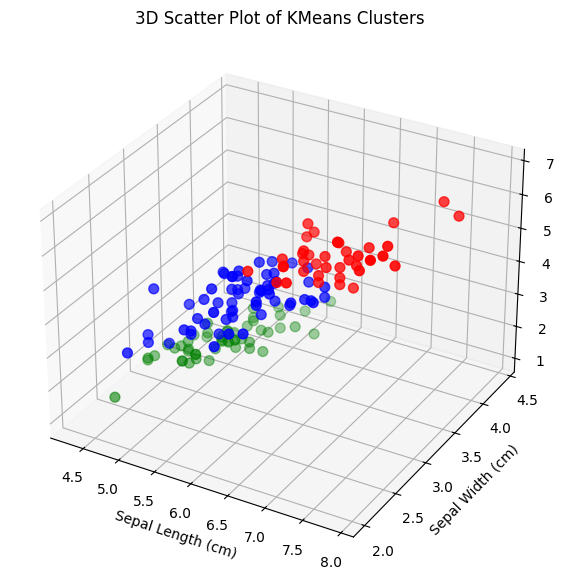

In [35]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)
labels = kmeans.labels_

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=[colors[i] for i in labels], s=50)

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D Scatter Plot of KMeans Clusters')

plt.show()

# B) Hierarchical Clustering
Hierarchical clustering builds a hierarchy of clusters and comes in two forms:
Agglomerative (Bottom-Up):



1.   Starts with each point as its own cluster.
2.   Clusters are merged iteratively based on similarity
3.   A dendrogram visualizes the hierarchy.


# Divisive (Top-Down):
1.Starts with all points in one cluster.
2.Iteratively splits into smaller clusters.

# Suitability for the Iris Dataset
Hierarchical clustering is effective for the Iris dataset as it reveals the natural structure with three species and allows visualization of cluster relationships via a dendrogram.



In [36]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply Hierarchical Clustering
linked = linkage(df_scaled, method='ward')

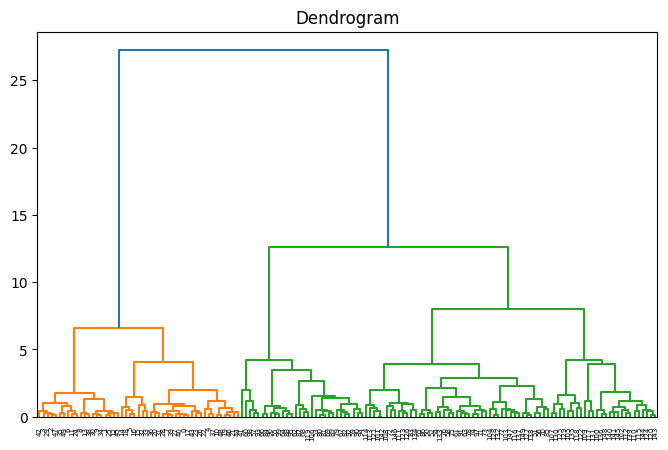

In [37]:
plt.figure(figsize=(8, 5))
dendrogram(linked)
plt.title('Dendrogram')
plt.show()

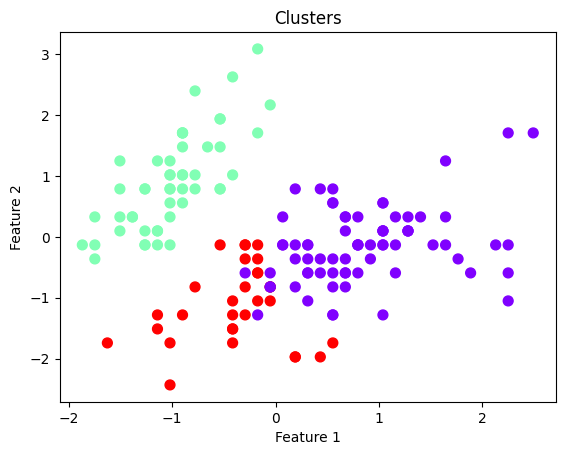

In [38]:
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = hc.fit_predict(df_scaled)

# Plot clusters
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels, cmap='rainbow', s=50)
plt.title('Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()